
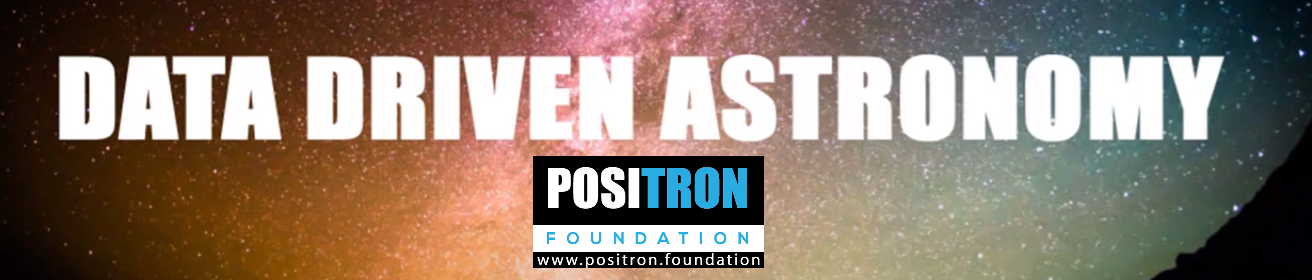




# **Initialization**

In [45]:
!pip install sdss-marvin --quiet

In [46]:
!git clone https://github.com/Jack3690/DDA

Cloning into 'DDA'...
remote: Enumerating objects: 425, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 425 (delta 106), reused 37 (delta 37), pack-reused 271
Receiving objects: 100% (425/425), 51.18 MiB | 22.75 MiB/s, done.
Resolving deltas: 100% (216/216), done.


## **Configuring Marvin**

In [47]:
!cp -a DDA/sas /root/

!cp -a DDA/sas/map.py /usr/local/lib/python3.7/dist-packages/marvin/utils/plot/

!mkdir  /root/sas/dr16
!cp -a /root/sas/mangawork/manga/ /root/sas/dr16

mkdir: cannot create directory ‘/root/sas/dr16’: File exists


In [48]:
cd DDA/Week_2/data

/content/DDA/Week_2/data/DDA/Week_2/data


# **Imports**

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib import colors
from matplotlib.colors import ListedColormap

import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import Planck15
from astropy.io import fits

from marvin import config
import marvin.utils.plot.map as mapplot 
from marvin.tools.maps import Maps
import marvin.utils.plot.colorbar as colorbar

# To improve Aesthetics of plots

import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['font.size'] = 15

In [50]:
# set the release to DR15
config.setRelease("DR15")
config.release

'DR15'

# **Contour Overlay**

In this section we'll learn how to overplot SDSS optical contours over MaNGA maps. Overplotting optical contours enables correlation between different galaxy components in resolved in MaNGA maps with their optical counterparts.

Write code to get Map of plateifu '8482-12705' and get the following

H alpha map

SDSS cutout 


DEBUG:marvin:local mode failed. Trying remote now.
DEBUG:marvin:local mode failed. Trying remote now.


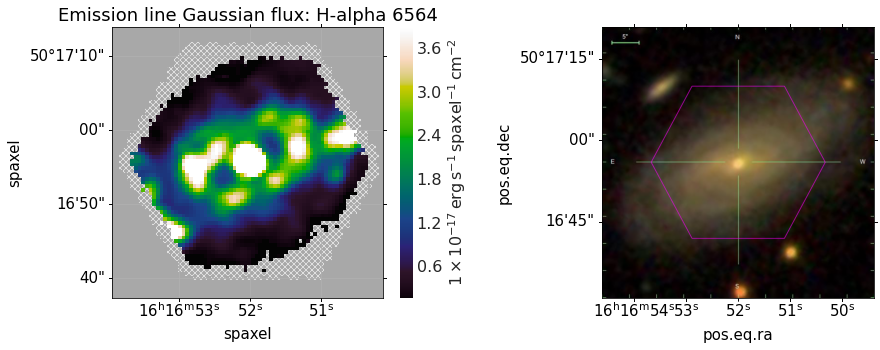

In [51]:
maps = Maps(plateifu= '8482-12705') 

ha =maps['emline_gflux_ha_6564']                      # H alpha

# Get Image

optical = maps.getImage()

# Plot the H alpha map and sdss cutout with wcs axes

fig = plt.figure(figsize=(15,5))

# We will use gridspec

gs = gridspec.GridSpec(1,2,width_ratios=[0.8,1])

ax1 = fig.add_subplot(gs[0,0], projection = maps.wcs, slices=['x','y',0])

mapplot.plot(dapmap=ha,fig=fig,ax=ax1)

ax2 = fig.add_subplot(gs[0,1], projection = optical.wcs)

ax2.imshow(optical.data)

We notice that the angular size of map and sdss cutout are different. For getting better results we should get cutout which matches the angular size of the MaNGA map. We will use WCS object of the map for this purpose

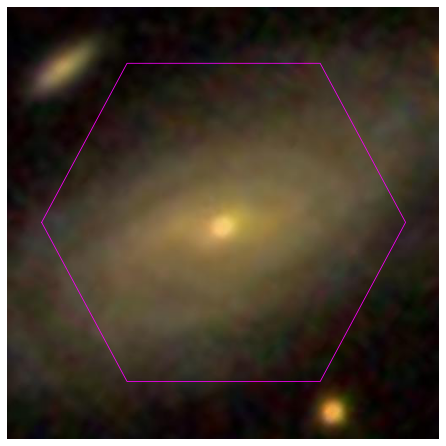

In [52]:
# Set the size of image cutout

scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds

# Getting new cutout

optical.get_new_cutout(width = size, height = size,scale = size/512)

ax = optical.plot()

optical.overlay_hexagon(ax=ax)

Let's take one of the bands of the RGB image of this cutout for plotting contours

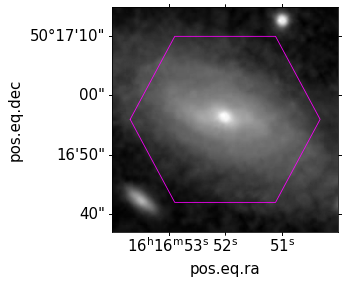

In [53]:
filter_r = np.array(optical.data)[:,:,0]  
fig = plt.figure(figsize=(10,10))

# Subplot with WCS projection using object optical
ax =fig.add_subplot(gs[0,0], projection = optical.wcs)

# Imshow filter_r with cmap = 'gray

ax.imshow(filter_r,cmap = 'gray')

# Overlay Hexagon on ax
optical.overlay_hexagon(ax=ax)


We notice that the image orientation doesn't match after slicing. We need to correct for it.

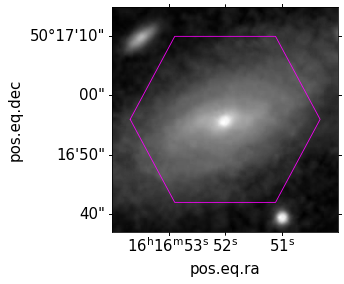

In [54]:
filter_r = np.rot90(np.array(optical.data)[:,:,0].T ) # Correction based on WCS projection

fig = plt.figure()
# Add Subplot with WCS projection from object optical

ax = fig.add_subplot(gs[0,0], projection = optical.wcs)
# Imshow filter_r with cmap = 'gray
ax.imshow(filter_r,cmap = 'gray')

# Overlay Hexagon on ax
optical.overlay_hexagon(ax=ax)


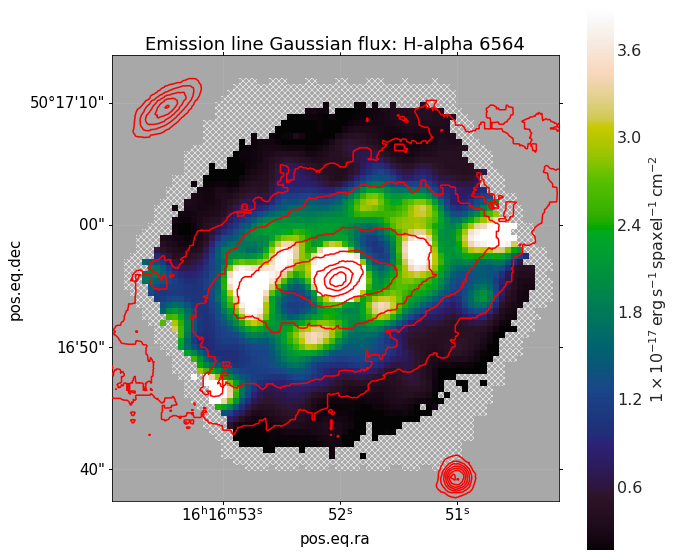

In [55]:
# Contour over plot on H alpha map

fig = plt.figure(figsize = (10,10))

# maps wcs axes
ax = fig.add_subplot(projection=maps.wcs, slices = ['x','y',0])

fig,ax,cb = mapplot.plot(dapmap=ha, fig = fig, ax = ax, return_cb=True)

ax.set_autoscale_on(False)

# Contour levels
levels=[60., 90., 120., 150., 180., 210., 240.]

# Adding contours and transforming it to fit map
ax.contour(filter_r, transform = ax.get_transform(optical.wcs), colors='red',  levels=levels,zorder=11)

ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

**Exercise 4.1**

Write code to for generating Gas-Phase Metallicity map for plateifu = '8595-12705' and  overplot SDSS optical contours. ( Look at previous section for help)

DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: divide by zero encountered in power (RuntimeWarning)
  return np.log10(np.e) * ivar**-0.5 / value

[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
  return np.log10(np.e) * ivar**-0.5 / value

[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
  value=ufunc(self.value),

DEBUG:marvin:local mode failed. Trying remote now.


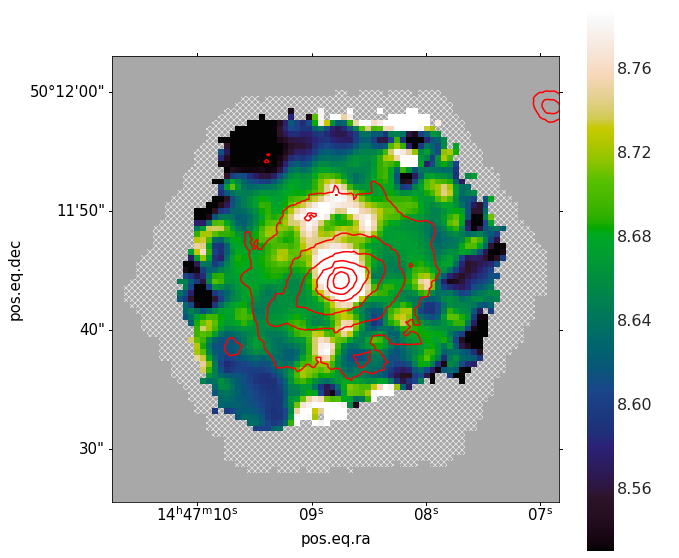

In [56]:
maps = Maps(plateifu= '8595-12705') 
ha =maps['emline_gflux_ha_6564'] 
nii = maps['emline_gflux_6585']
n2  = nii/ha

logn2 = np.log10(n2)

logoh =  8.9+(0.57*logn2)

ax = fig.add_subplot(projection=maps.wcs, slices = ['x','y',0])

optical = maps.getImage()
scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds
optical.get_new_cutout(width = size, height = size)

filter_r = np.rot90(np.array(optical.data)[:,:,0].T ) 

fig = plt.figure(figsize = (10,10))


ax = fig.add_subplot(projection=maps.wcs, slices = ['x','y',0])

fig,ax,cb = mapplot.plot(dapmap=logoh, fig = fig, ax = ax, return_cb=True)

ax.set_autoscale_on(False)

ax.grid(False)

# Contour levels
levels=[60., 90., 120., 150., 180., 210., 240.]

# Adding contours and transforming it to fit map
ax.contour(filter_r, transform = ax.get_transform(optical.wcs), colors='red',  levels=levels,zorder=11)

ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

# **BPT**

The BPT diagrams (named after "Baldwin, Phillips & Telervich") are a set of nebular emission line diagrams used to distinguish the ionization mechanism of nebular gas. The most famous version consists of [NII]6584/Ha versus [OIII]5007/Hb (the BPT-NII diagram; Fig. 5 of Baldwin et al 1981). We used BPT diagrams in Module 1.2.

Get BPT diagram for plateifu = '8443-9101'.

DEBUG:marvin:local mode failed. Trying remote now.


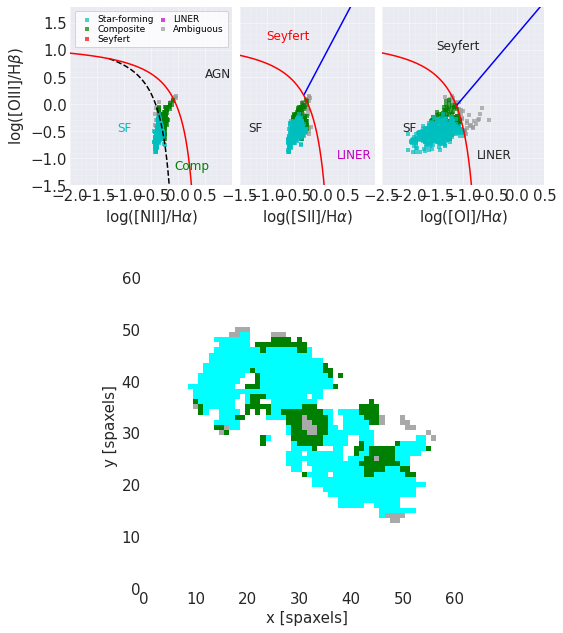

In [57]:
maps = Maps(plateifu='8443-9101')

mask, fig, ax = maps.get_bpt()

In [58]:
mask.keys()

dict_keys(['sf', 'comp', 'agn', 'seyfert', 'liner', 'invalid', 'ambiguous'])

Get global mask of ['sf', 'comp', 'seyfert', 'liner', 'ambiguous'
] in the mask object

DEBUG:marvin:local mode failed. Trying remote now.


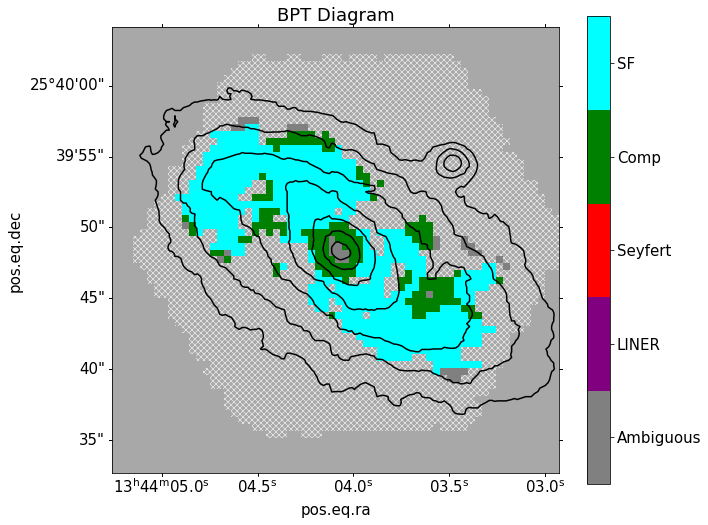

In [59]:
# Complete the missing lines

SF = mask['sf']['global'].astype(np.float64)
COMP = mask['comp']['global'].astype(np.float64)
SEYF = mask['seyfert']['global'].astype(np.float64)
LIN = mask['liner']['global'].astype(np.float64)
AMB = mask['ambiguous']['global'].astype(np.float64)

# Giving labels to each class

SF   *= 5
COMP *= 4
SEYF *= 3
LIN  *= 2
AMB  *= 1

# Sum the above masks
bpt = SF + COMP + SEYF + LIN + AMB

# Let's make a color map for BPT map

cmap = colors.ListedColormap(['grey', 'purple', 'red','green', 'cyan'])

# IFU nocov mask
ha = maps.emline_gew_ha_6564 # For getting pixmask

nocov = ha.pixmask.get_mask('NOCOV')

# Plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs, slices = ['x','y',0])
# Mapplot plot
fig, ax, cb = mapplot.plot(value=bpt, ivar = bpt, mask=nocov, 
                           cmap=cmap,fig=fig,ax=ax, use_masks='NOCOV',
                           return_cb=True, cbrange=(0.5, 5.5), title='BPT Diagram')

ax.set_autoscale_on(False)

# Over plot optical contours with black color and given levels

levels=[60., 90., 120., 150., 180., 210., 240.]

# Get SDSS image 

optical = maps.getImage()

# Prepare for plotting contours

# Set the size of image cutout

scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds

# Getting new cutout

optical.get_new_cutout(width = size, height = size)

filter_r = np.rot90(np.array(optical.data)[:,:,0].T )

# Remove grid
ax.grid(False)

# Plot contours and transform it with optical.wcs and assign the contours black color with levels = levels and zorder =11
ax.contour(filter_r, transform=ax.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

# Remove default colorba
cb.remove()
# Generate new color bar
cb = plt.colorbar(ax.get_images()[1],ax=ax,anchor=(0,5),shrink=0.86)
cb.set_ticks([1, 2, 3, 4, 5])
cb.set_ticklabels(['Ambiguous','LINER','Seyfert','Comp', 'SF'])
# Set x and y label
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')


# **WHAN**

$W_{H_{\alpha}}$ versus [NII]/Ha (WHAN) diagram is a comprehensive emission-line classification scheme introduced by Cid Fernandes et al. (2011). Emission-line classifications of galaxies are among the easiest to carry out (once the emission-line intensities are measured) and allow one to deal with issues such as star formation, chemical composition, or nuclear activity. WHAN (see figure 2.2) uses the width of H alpha line ( $W_{H_{\alpha}}$ ) and [N II]/ $H_{\alpha}$ , where $W_{H_{\alpha}}$ measures the amount of ionizing photons absorbed by the gas relative to the stellar mass, while [N II]/$H_{\alpha}$ is a function of the nitrogen abundance, the ionization state and
temperature of the gas.

**Exercise 4.2**

Follow the instructions and complete the code to generate WHAN map

In [60]:
maps = Maps(plateifu='8443-9101')

# WHAN
nii = maps['emline_gflux_6585']                            # Get emline gaussian flux of nii with wavelength 6585
ha = maps['emline_gflux_ha_6564']                             # Get emline gaussian flux of H alpha  with wavelength 6564
niiha = nii/ha

ewha = maps['emline_sew_ha_6564']                           # Get emline_sew of H alpha  with wavelength 6564
ewnii =maps['emline_sew_6585']                          # Get emline_sew of nii with wavelength 6585

# Take the log of the NII/Ha ratio
logniiha = np.log10(niiha.value)

DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
  if sys.path[0] == '':



**WHAN Classification Scheme**

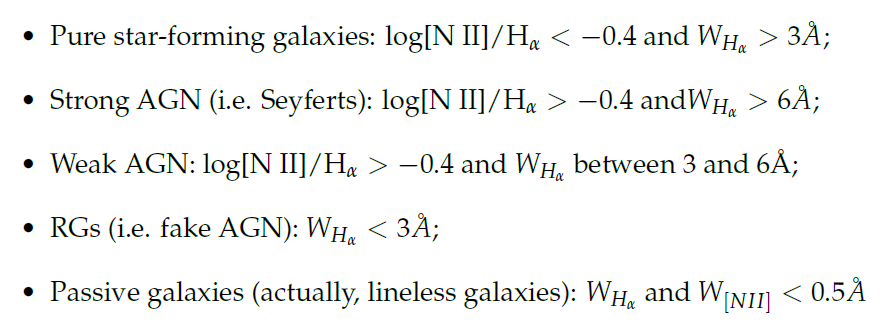

$W_{H_{\alpha}}$ = ewha

$W_{[NII]}$ = ewnii

$\log\dfrac{[NII]}{H_{\alpha}}$ = logniiha

In [61]:
# Create the WHAN categories. Hint : Use ewha.value, ewnii.value, and logniiha

psf  = (logniiha < -0.4) & (ewha.value > 3)                       # Pure Star Forming
sagn = (logniiha > -0.4) & (ewha.value > 6)                                                            # Strong AGN
wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))                                                            # Weak AGN
rg   =  (ewha.value < 3)                                                        # Retired Galaxy  
pg   =  (ewha.value < 0.5) & (ewnii.value < 0.5)                                                          # Passive Galaxy

In [62]:
# Create a custom array for a WHAN categories (we copy the EW Ha array just to get a 2d-array of the original size)

value = ewha.value.copy()
value[psf]  = 1     # pure star-forming 
value[sagn] = 2     # strong agn
value[wagn] = 3     # weak agn
value[rg]   = 4     # retired galaxies
value[pg]   = 5     # passive galaxies

In [63]:
# Set ivar to 0 where the SNR < 1

niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
ewha_low_snr  = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
# Complete the code
ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)

low_snr       = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)

[WARNING]: invalid value encountered in multiply (RuntimeWarning)
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True



DEBUG:marvin:local mode failed. Trying remote now.


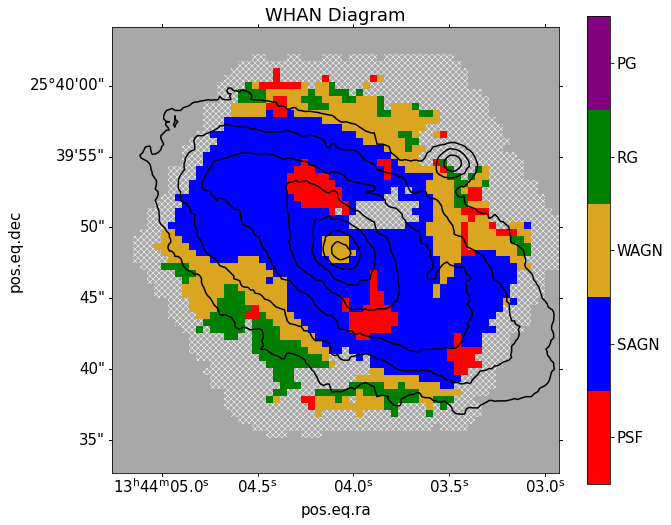

In [64]:
ivar = ewha.value.copy()
ivar[low_snr] = 0
value[low_snr] = 6

# WHAN IFU

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
#  Remove grid
ax.grid(False)

# Create colormap with colors 'red', 'blue', 'goldenrod', 'green', 'purple'
cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

# Get nocov mask from ewha map

nocov = ewha.pixmask.get_mask('NOCOV')

# Mapplot.plot  function call
fig, ax, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap,fig=fig,ax=ax, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='WHAN Diagram')

# Set autoscale to False
ax.set_autoscale_on(False)

# Get SDSS optical image
optical = maps.getImage()

# Set the size of image cutout 
scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds


# Get new cutout with new size
optical.get_new_cutout(width = size, height = size)



# Slice the optical image and get r band data
filter_r = np.rot90(np.array(optical.data)[:,:,0].T )

# Assign levels [60.,  90., 120., 150., 180., 210., 240.]
levels=[60., 90., 120., 150., 180., 210., 240.]
# Create contour of filter_r and transform it using optical.wcs. Give color = 'black' and zorder=11
ax.contour(filter_r, transform=ax.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)


# Remove default colorbar
cb.remove()
# Create new color bar
cb = plt.colorbar(ax.get_images()[1],ax=ax,anchor=(0,5),shrink=0.86)

# Set ticks [1, 2, 3, 4, 5]
cb.set_ticks([1, 2, 3, 4, 5])

# Set ticklabels ['PSF', 'SAGN', 'WAGN', 'RG', 'PG']
cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

# Set axes labels
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')

# **Puzzle V**

Write code to generate BPT and WHAN map for plateifu = '8595-12705'. Plot the two maps with WCS projection. Create an array which stores the sum of values of BPT and WHAN map

DEBUG:marvin:local mode failed. Trying remote now.


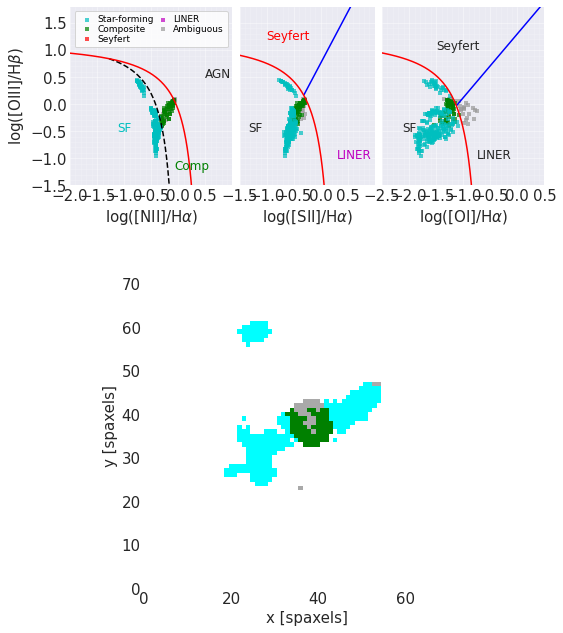

DEBUG:marvin:local mode failed. Trying remote now.


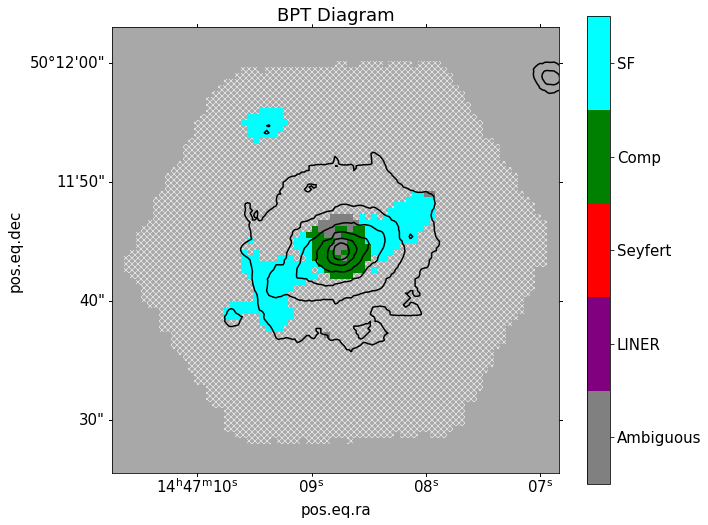

In [65]:
maps = Maps(plateifu='8595-12705')

# Generate BPT map with WCS projection and overplot SDSS contours
mask, fig, ax = maps.get_bpt()

SF = mask['sf']['global'].astype(np.float64)
COMP = mask['comp']['global'].astype(np.float64)
SEYF = mask['seyfert']['global'].astype(np.float64)
LIN = mask['liner']['global'].astype(np.float64)
AMB = mask['ambiguous']['global'].astype(np.float64)

# Giving labels to each class

SF   *= 5
COMP *= 4
SEYF *= 3
LIN  *= 2
AMB  *= 1

# Sum the above masks
bpt = SF + COMP + SEYF + LIN + AMB

# Let's make a color map for BPT map

cmap = colors.ListedColormap(['grey', 'purple', 'red','green', 'cyan'])

# IFU nocov mask
ha = maps.emline_gew_ha_6564 # For getting pixmask

nocov = ha.pixmask.get_mask('NOCOV')

# Plot
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection = maps.wcs, slices = ['x','y',0])
# Mapplot plot
fig, ax, cb = mapplot.plot(value=bpt, ivar = bpt, mask=nocov, 
                           cmap=cmap,fig=fig,ax=ax, use_masks='NOCOV',
                           return_cb=True, cbrange=(0.5, 5.5), title='BPT Diagram')

ax.set_autoscale_on(False)

# Over plot optical contours with black color and given levels

levels=[60., 90., 120., 150., 180., 210., 240.]

# Get SDSS image 

optical = maps.getImage()

# Prepare for plotting contours

# Set the size of image cutout

scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds

# Getting new cutout

optical.get_new_cutout(width = size, height = size)

filter_r = np.rot90(np.array(optical.data)[:,:,0].T )

# Remove grid
ax.grid(False)

# Plot contours and transform it with optical.wcs and assign the contours black color with levels = levels and zorder =11
ax.contour(filter_r, transform=ax.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)

# Remove default colorba
cb.remove()
# Generate new color bar
cb = plt.colorbar(ax.get_images()[1],ax=ax,anchor=(0,5),shrink=0.86)
cb.set_ticks([1, 2, 3, 4, 5])
cb.set_ticklabels(['Ambiguous','LINER','Seyfert','Comp', 'SF'])
# Set x and y label
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')





















DEBUG:marvin:local mode failed. Trying remote now.
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
  del sys.path[0]

[WARNING]: invalid value encountered in multiply (RuntimeWarning)
  low_snr[np.abs(value * np.sqrt(ivar)) < snr_min] = True

DEBUG:marvin:local mode failed. Trying remote now.


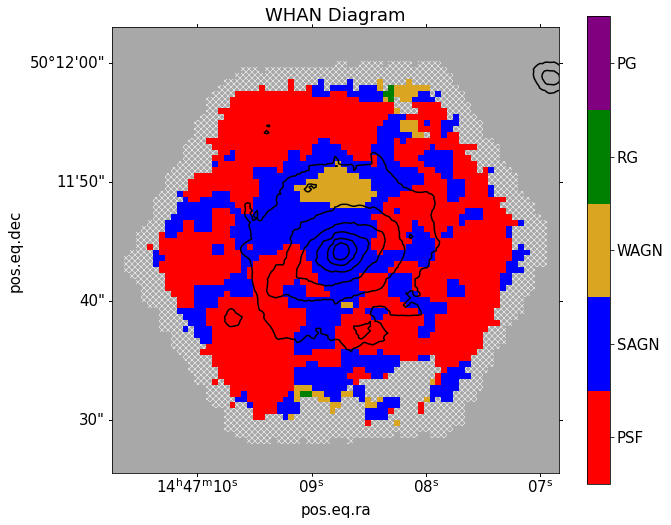

In [66]:
maps = Maps(plateifu='8595-12705')

# Generate WHAN map with WCS projection and overplot SDSS contours

nii = maps['emline_gflux_6585']                            # Get emline gaussian flux of nii with wavelength 6585
ha = maps['emline_gflux_ha_6564']                             # Get emline gaussian flux of H alpha  with wavelength 6564
niiha = nii/ha

ewha = maps['emline_sew_ha_6564']                           # Get emline_sew of H alpha  with wavelength 6564
ewnii =maps['emline_sew_6585']                          # Get emline_sew of nii with wavelength 6585

# Take the log of the NII/Ha ratio
logniiha = np.log10(niiha.value)

psf  = (logniiha < -0.4) & (ewha.value > 3)                       # Pure Star Forming
sagn = (logniiha > -0.4) & (ewha.value > 6)                                                            # Strong AGN
wagn = (logniiha > -0.4) & ((ewha.value > 3) & (ewha.value < 6))                                                            # Weak AGN
rg   =  (ewha.value < 3)                                                        # Retired Galaxy  
pg   =  (ewha.value < 0.5) & (ewnii.value < 0.5)                                                          # Passive Galaxy


value = ewha.value.copy()
value[psf]  = 1     # pure star-forming 
value[sagn] = 2     # strong agn
value[wagn] = 3     # weak agn
value[rg]   = 4     # retired galaxies
value[pg]   = 5     # passive galaxies



niiha_low_snr = mapplot.mask_low_snr(niiha.value, niiha.ivar, snr_min=1)
ewha_low_snr  = mapplot.mask_low_snr(ewha.value, ewha.ivar, snr_min=1)
# Complete the code
ewnii_low_snr = mapplot.mask_low_snr(ewnii.value, ewnii.ivar, snr_min=1)

low_snr       = np.logical_or(niiha_low_snr, ewha_low_snr, ewnii_low_snr)


ivar = ewha.value.copy()
ivar[low_snr] = 0
value[low_snr] = 6

# WHAN IFU

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(projection=maps.wcs,slices=('x','y',0))
#  Remove grid
ax.grid(False)

# Create colormap with colors 'red', 'blue', 'goldenrod', 'green', 'purple'
cmap = colors.ListedColormap(['red', 'blue', 'goldenrod', 'green', 'purple'])

# Get nocov mask from ewha map

nocov = ewha.pixmask.get_mask('NOCOV')

# Mapplot.plot  function call
fig, ax, cb = mapplot.plot(value=value, ivar=ivar, mask=nocov, cmap=cmap,fig=fig,ax=ax, use_masks='NOCOV', return_cb=True, cbrange=(0.5, 5.5), title='WHAN Diagram')

# Set autoscale to False
ax.set_autoscale_on(False)

# Get SDSS optical image
optical = maps.getImage()

# Set the size of image cutout 
scale = maps.wcs.to_header()['PC2_2']*3600  # Gives arcsec/ pixel

size = 2*maps.wcs.to_header()['CRPIX1']*scale # Give angular size in arcseconds


# Get new cutout with new size
optical.get_new_cutout(width = size, height = size)



# Slice the optical image and get r band data
filter_r = np.rot90(np.array(optical.data)[:,:,0].T )

# Assign levels [60.,  90., 120., 150., 180., 210., 240.]
levels=[60., 90., 120., 150., 180., 210., 240.]
# Create contour of filter_r and transform it using optical.wcs. Give color = 'black' and zorder=11
ax.contour(filter_r, transform=ax.get_transform(optical.wcs), colors='black',levels=levels,zorder=11)


# Remove default colorbar
cb.remove()
# Create new color bar
cb = plt.colorbar(ax.get_images()[1],ax=ax,anchor=(0,5),shrink=0.86)

# Set ticks [1, 2, 3, 4, 5]
cb.set_ticks([1, 2, 3, 4, 5])

# Set ticklabels ['PSF', 'SAGN', 'WAGN', 'RG', 'PG']
cb.set_ticklabels(['PSF', 'SAGN', 'WAGN', 'RG', 'PG'])

# Set axes labels
ax.set_xlabel('pos.eq.ra')
ax.set_ylabel('pos.eq.dec')





Add the bpt and value arrays

In [71]:
data_sum =bpt+value      

Load the image data in the fits file 'puzzle_V.fits'. Upload and load image data from 'puzzle_4_solution.fits' which was the solution for Puzzle IV. For using files on your computer, you have to upload the file to the current working directory of colab, which in our case is DDA/Week_2/data

In [75]:
f1 = fits.open('puzzle_V.fits'  )
data_v = f1[0].data                    # Puzzle V Data

f2 = fits.open('puzzle_4_solution.fits'  )
data_iv = f2[0].data                     # Puzzle IV Data

data_iv = np.pad(data_iv,6)  # To match the shape of two arrays

Subtract data_sum from data_v, then add data_iv. Plot the resultant array using imshow

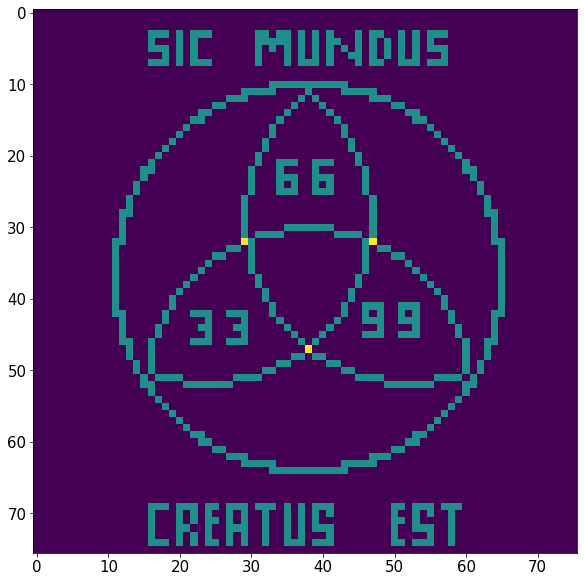

In [76]:
data_f = data_v-data_sum+data_iv
plt.imshow(data_f)

Save the final array as a fits file with name 'puzzle_5_solution.fits' for submission and future reference.

In [77]:
hdu  = fits.PrimaryHDU(data_f)
# Complete the code
hdul = fits.HDUList(hdu)
hdul.writeto('puzzle_5_solution.fits', overwrite = True)